### In this notebook I created plots for [this blog post](https://mf1024.github.io/2019/06/09/how-to-scrape-the-imagenet/).

### It's related to [ImageNet downloader](https://github.com/mf1024/ImageNet-datasets-downloader) which I wrote to ease the process of collecting ImageNet images

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import matplotlib.ticker as ticker
import os
import csv
import matplotlib.pyplot as plt
import codecs
import json
plt.style.use('seaborn')

In [2]:

URL_WORDNET = 'http://image-net.org/archive/words.txt'
current_folder = './'

wordnet_filename = URL_WORDNET.split('/')[-1]
wordnet_file_path = os.path.join(current_folder, wordnet_filename)
if not os.path.exists(wordnet_file_path):

    resp = requests.get(URL_WORDNET)

    with open(wordnet_file_path, "wb") as file:
        file.write(resp.content)
        file.close()

# Downloaded from http://image-net.org/imagenet_data/urls/imagenet_fall11_urls.tgz
url_list_filepath = '/Users/martinsf/ai/datasets/imagenet/fall11_urls.txt'
img_url_dict = dict()

total_urls = 0
flickr_urls = 0

#Go trough the urls list and count urls per class and flickr_urls per class, store the info in csv
with codecs.open(url_list_filepath, 'r', encoding='utf-8', errors='ignore') as f:
    it = 0
    for line  in f:
        it += 1
        row = line.split('\t')

        if (len(row) != 2):
            continue
        id = row[0].split('_')[0]
        url = row[1]

        if not id in img_url_dict:
            img_url_dict[id] = dict(urls = 0, flickr_urls = 0)

        img_url_dict[id]['urls'] += 1
        total_urls += 1
        if 'flickr' in url:
            flickr_urls += 1
            img_url_dict[id]['flickr_urls'] += 1
            
    img_counts = []
    total_url_counts = []
    flickr_url_counts = []

    for key, val in img_url_dict.items():
        total_url_counts.append(val['urls'])
        flickr_url_counts.append(val['flickr_urls'])


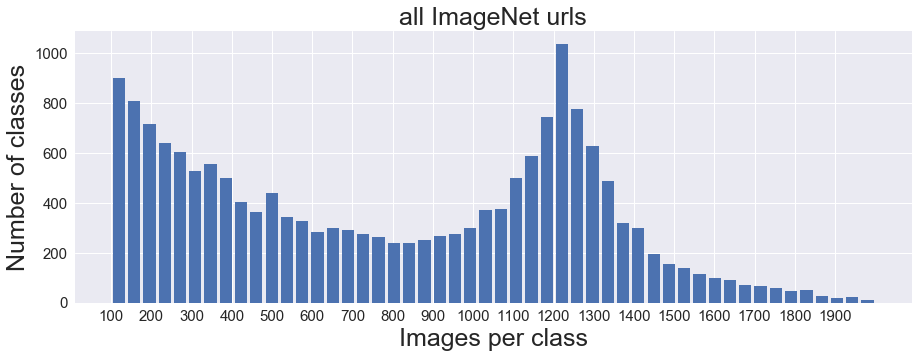

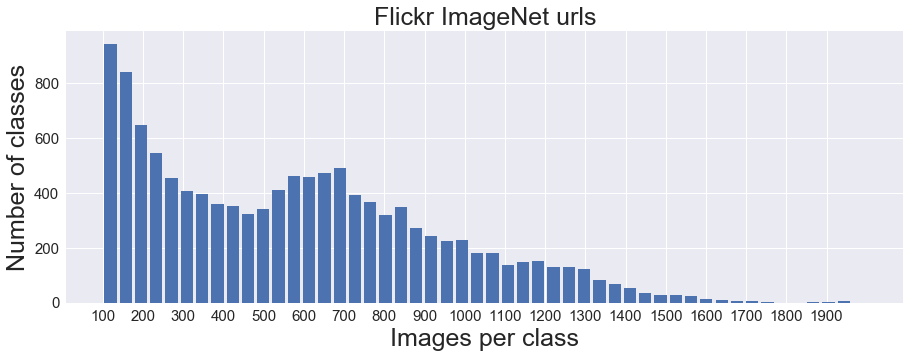

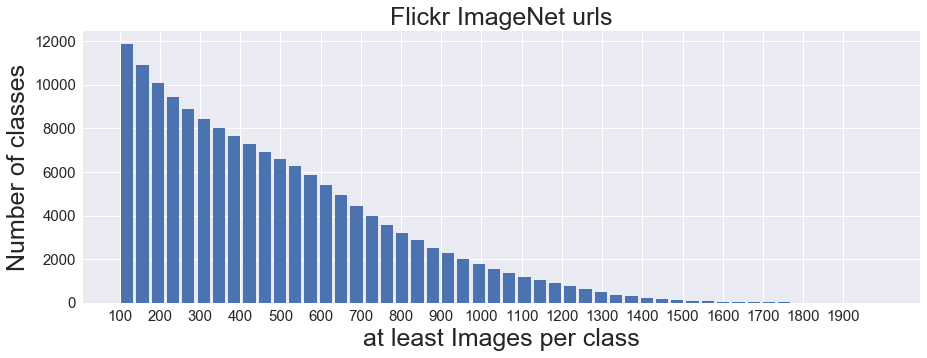

In [3]:
fig = plt.figure(figsize=(15,5))
axs = plt.gca()
axs.hist(total_url_counts, range=(100,2000), bins=50, rwidth=0.8)
axs.set_title('all ImageNet urls', fontdict={'fontsize':25})
axs.set_xticks([x for x in range(100,2000,100)])
axs.set_xlabel("Images per class", fontsize = 25)
axs.set_ylabel("Number of classes", fontsize = 25)
plt.tick_params(axis='both', labelsize=15)
plt.show()

fig = plt.figure(figsize=(15,5))
axs = plt.gca()
axs.set_title('Flickr ImageNet urls', fontdict={'fontsize':25})
axs.hist(flickr_url_counts, range=(100,2000), bins=50, rwidth=0.8)
axs.set_xticks([x for x in range(100,2000,100)])

axs.set_xlabel("Images per class", fontsize = 25)
axs.set_ylabel("Number of classes", fontsize = 25)
plt.tick_params(axis='both', labelsize=15)
plt.show()
    
fig = plt.figure(figsize=(15,5))
axs = plt.gca()
axs.set_title('Flickr ImageNet urls', fontdict={'fontsize':25})
axs.hist(flickr_url_counts, range=(100,2000), bins=50, rwidth=0.8, cumulative=-1)
axs.set_xticks([x for x in range(100,2000,100)])
axs.set_xlabel("at least Images per class", fontsize = 25)
axs.set_ylabel("Number of classes", fontsize = 25)
plt.tick_params(axis='both', labelsize=15)
plt.show()






### Here I analyze 'stats.csv' where I collected data from actual download process by running [ImageNet downloader](https://github.com/mf1024/ImageNet-datasets-downloader) in debug mode. 

In [6]:
results = pd.read_csv('stats.csv')

In [9]:
results.tail(15)

,all_tried,all_success,all_time_spent,is_flickr_tried,is_flickr_success,is_flickr_time_spent,not_flickr_tried,not_flickr_success,not_flickr_time_spent
254,25499,14779,23318.266231,13358,10984,5709.805362,12141,3795,17608.460869
255,25599,14845,23388.289580,13422,11037,5736.749524,12177,3808,17651.540056
256,25699,14916,23445.683436,13491,11094,5767.404812,12208,3822,17678.278624
257,25799,14987,23550.476428,13553,11148,5792.200227,12246,3839,17758.276201
258,25899,15044,23631.457047,13606,11190,5815.485327,12293,3854,17815.971720
259,25999,15115,23715.470664,13665,11239,5839.385250,12334,3876,17876.085414
260,26099,15174,23823.309306,13707,11275,5856.511146,12392,3899,17966.798160
261,26199,15202,23994.937516,13708,11276,5856.933714,12491,3926,18138.003802
262,26299,15239,24126.630738,13708,11276,5856.933714,12591,3963,18269.697024
263,26399,15270,24258.188346,13710,11277,5858.570111,12689,3993,18399.618235


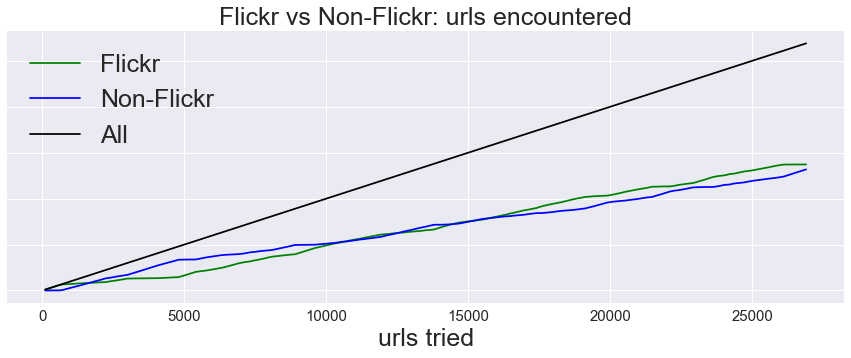

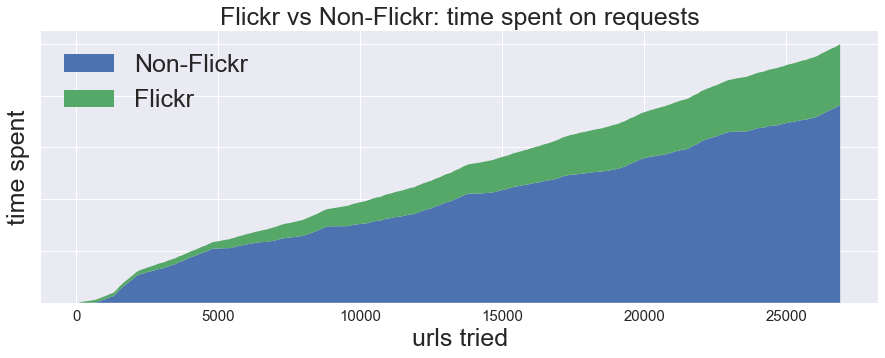

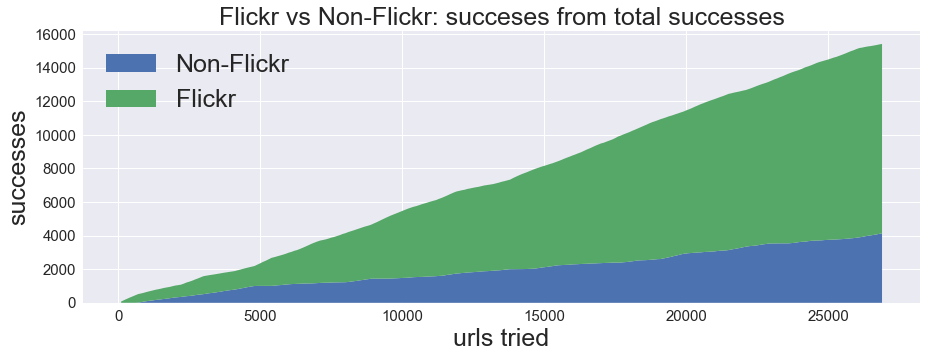

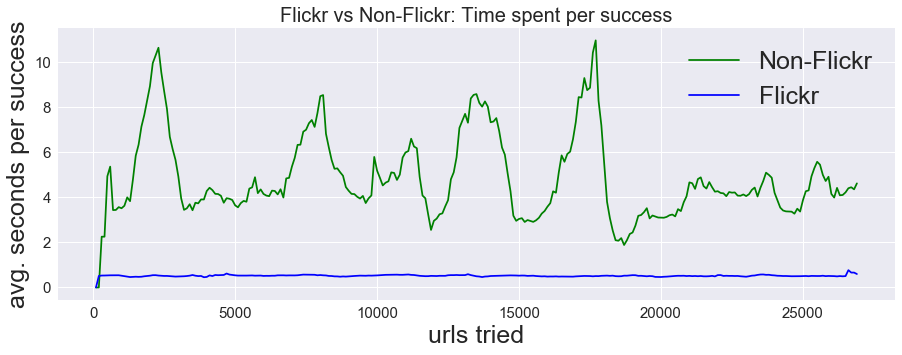

In [10]:
fig = plt.figure(figsize=(15,5))
urls = [(i+1)*100 for i in range(len(results['is_flickr_time_spent']))]
axs = plt.gca()
axs.set_title("Flickr vs Non-Flickr: urls encountered", fontdict={'fontsize':25})
axs.set_xlabel("urls tried", fontsize=25)
axs.plot(urls, results['is_flickr_tried'].values , color='g', label="Flickr")
axs.plot(urls, results['not_flickr_tried'].values, color='b', label="Non-Flickr")
axs.plot(urls, results['all_tried'].values, color='black', label="All")
plt.legend(prop={'size': 25})

#plt.tick_params(axis='y', which='y', bottom=False, top=False, labelbottom=False)
axs.set_yticklabels([])
plt.tick_params(axis='x', labelsize=15)
plt.show()


fig = plt.figure(figsize=(15,5))
axs = plt.gca()
axs.set_title("Flickr vs Non-Flickr: time spent on requests", fontdict={'fontsize':25})
axs.set_xlabel("urls tried", fontsize=25)
axs.set_ylabel("time spent", fontsize=25)
urls = [(i+1)*100 for i in range(len(results['is_flickr_time_spent']))]
axs.stackplot(urls, results['not_flickr_time_spent'].values, results['is_flickr_time_spent'].values, labels=["Non-Flickr","Flickr"])
#axs.plot(results['is_flickr_time_spent'], color='r', label="Flickr")
#axs.plot(results['not_flickr_time_spent'], color='g', label="Not Flickr")
plt.legend(loc=2, prop={'size': 25})
#plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
#plt.tick_params(axis='x', labelsize=25)
axs.set_yticklabels([])
plt.tick_params(axis='x', labelsize=15)
plt.show()



fig = plt.figure(figsize=(15,5))
axs = plt.gca()
axs.set_title("Flickr vs Non-Flickr: succeses from total successes", fontdict={'fontsize':25})
axs.set_xlabel("urls tried", fontsize=25)
axs.set_ylabel("successes", fontsize=25)
urls = [(i+1)*100 for i in range(len(results['is_flickr_time_spent']))]
unsuccessful = results['all_tried'] - results['all_success']
is_flickr_unsuccessful = results['is_flickr_tried'] - results['is_flickr_success']
not_flickr_unsuccessful = results['not_flickr_tried'] - results['not_flickr_success']
axs.stackplot(urls, 
              (results['not_flickr_success']).values, 
              results['is_flickr_success'].values,
              labels=["Non-Flickr","Flickr"])
#axs.plot(results['is_flickr_time_spent'], color='r', label="Flickr")
#axs.plot(results['not_flickr_time_spent'], color='g', label="Not Flickr")
plt.legend(loc=2, prop={'size': 25})
plt.tick_params(axis='both', labelsize=15)
plt.show()



fig = plt.figure(figsize=(15,5))
axs = plt.gca()
axs.set_title("Flickr vs Non-Flickr: Time spent per success", fontdict={'fontsize':20})
axs.set_xlabel("urls tried", fontsize=25)
axs.set_ylabel("avg. seconds per success", fontsize=25)
urls = [(i+1)*100 for i in range(len(results['is_flickr_time_spent']))]


time_spent_flickr = pd.DataFrame(np.zeros(len(results['is_flickr_time_spent'])))
time_spent_not_flickr = pd.DataFrame(np.zeros(len(results['is_flickr_time_spent'])))


for i in range(len(results['is_flickr_time_spent'])):
    if results['is_flickr_success'].values[i]!=results['is_flickr_success'].values[max(0,i-5)]:
        time_spent_flickr.at[i,0] = (results['is_flickr_time_spent'].values[i] - results['is_flickr_time_spent'].values[max(0,i-5)])/((results['is_flickr_success'].values[i]-(results['is_flickr_success'].values[max(0,i-5)])))
    
    if results['not_flickr_success'].values[i]!=results['not_flickr_success'].values[max(0,i-10)]:
        time_spent_not_flickr.at[i, 0] = (results['not_flickr_time_spent'].values[i] - results['not_flickr_time_spent'].values[max(0,i-10)])/((results['not_flickr_success'][i]-(results['not_flickr_success'].values[max(0,i-10)])))


   # print(f'{results["is_flickr_time_spent"].values[i]} {results["is_flickr_success"].values[i]} {results["is_flickr_time_spent"].values[max(0,i-1)]} ')


#axs.plot(urls, (results['is_flickr_time_spent']/(results['is_flickr_success']+0.1)).values, color='r', label="Flickr")
#axs.plot(urls, (results['not_flickr_time_spent']/(results['not_flickr_success']+0.1)).values, color='g', label="Not Flickr")
axs.plot(urls, time_spent_not_flickr.values, color='g', label="Non-Flickr")
axs.plot(urls, time_spent_flickr.values, color='b', label="Flickr")
plt.tick_params(axis='both', labelsize=15)
plt.legend(prop={'size': 25})
plt.show()